Naive Bayes adalah sebuah algoritma machine learning tipe supervised - ada fitur, ada target yang menggunakan konsep hitung hitungan likelihood (probabilitas)

## Case Study
kita gunakan data airbnb dari Kaggle: https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

dari data ini, kita akan membuat model classification yang bisa memprediksi apakah seorang host "superhost" atau "bukan superhost" - ada 2 kategori.

In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# naive bayes model dari sklearn
from sklearn.naive_bayes import GaussianNB
# decision tree
from sklearn.tree import DecisionTreeClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machine
from sklearn.svm import SVC

# encoding - mengubah data text categorical jadi numeric
# scaler - membuat data memiliki skala yang sama
from sklearn.preprocessing import LabelEncoder, StandardScaler

# split train dan test data
from sklearn.model_selection import train_test_split

# evaluasi model classification
from sklearn.metrics import confusion_matrix, classification_report

# package yang digunakan untuk membuat visualisasi decision tree model
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

# Naive Bayes
adalah sebuah algoritma machine learning tipe supervised - ada fitur, ada target yang menggunakan konsep hitung hitungan likelihood (probabilitas)


In [2]:
# 1. import data
df_abnb = pd.read_csv("../dataset/Aemf1.csv")
df_abnb.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [3]:
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

untuk case study kali ini, kita akan gunakan 7 kolom pertama sebagai fitur (input). Lalu kolom ke-8 "Superhost" sebagai targetnya.

model kita akan menerima 7 angka sebagai input dan membuat prediksi 1 angka (1 superhost, 0 bukan superhost)

--- data ini sudah di clean dari missing dan invalid values, juga sudah dibuat tipe data sesuai, jadi kita skip step2 itu

kita lanjut ke encoding, lalu split data, baru latih model naive bayes nya

In [4]:
# pisahin data fitur (X) dan target (y)

X = df_abnb.iloc[:, 0:7]
X.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0


In [5]:
y = df_abnb.loc[:, "Superhost"]
y.head()

0    False
1    False
2    False
3    False
4     True
Name: Superhost, dtype: bool

target perlu di encode juga

In [6]:
# encoding
# perhatikan ada fitur2 yang data type nya masih non-numeric, kita convert jadi numeric menggunakan LabelEncoder

# siapin copy data kita
X_encoded = X.copy()

# buat encoder
le = LabelEncoder()

# untuk setiap kolom data yang mau di encode, kita replace data awal di df_abnb_encoded dengan versi encoded nya
kolom_yang_perlu_di_encode = ["City", "Day", "Room Type", "Shared Room", "Private Room"]

for col in kolom_yang_perlu_di_encode:
    X_encoded.loc[:, col] = le.fit_transform(X.loc[:, col])

    print(col, le.classes_)

X_encoded.head()

City ['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'Paris'
 'Rome' 'Vienna']
Day ['Weekday' 'Weekend']
Room Type ['Entire home/apt' 'Private room' 'Shared room']
Shared Room [False  True]
Private Room [False  True]


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity
0,0,194.033698,0,1,0,1,2.0
1,0,344.245776,0,1,0,1,4.0
2,0,264.101422,0,1,0,1,2.0
3,0,433.529398,0,1,0,1,4.0
4,0,485.552926,0,1,0,1,2.0


In [7]:
# kita perlu encode targetnya juga
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Superhost", le.classes_)
print(y_encoded[:5])

Superhost [False  True]
[0 0 0 0 1]


kalau mau scaling, bisa dilakukan setelah encoding

In [8]:
scaler = StandardScaler()

X_es = scaler.fit_transform(X_encoded)
X_es = pd.DataFrame(X_es, columns=X_encoded.columns)
X_es.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity
0,-1.923765,-0.236433,-0.998611,1.378413,-0.087368,1.475138,-0.952126
1,-1.923765,0.301180,-0.998611,1.378413,-0.087368,1.475138,0.586994
2,-1.923765,0.014341,-0.998611,1.378413,-0.087368,1.475138,-0.952126
3,-1.923765,0.620729,-0.998611,1.378413,-0.087368,1.475138,0.586994
4,-1.923765,0.806923,-0.998611,1.378413,-0.087368,1.475138,-0.952126


kita split data jadi training dan testing data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_es, y_encoded, random_state=10, test_size=0.2)
print(X_train.shape, X_test.shape)

(33371, 7) (8343, 7)


kita latih model

In [10]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [11]:
# evaluasi

# persiapan function untuk visualisasi confusion matrix dan classification report
def visualizeCM(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    n = len(cm) # jumlah label/ kategori

    fig, ax = plt.subplots(figsize=(n+1, n+1))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("actual")
    ax.set_ylim( n - 0.5, -0.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize = 20)
    plt.title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))

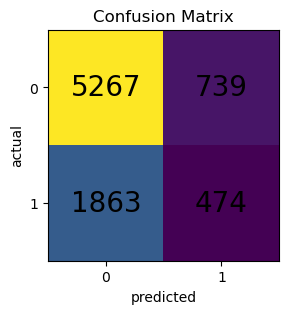

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      6006
           1       0.39      0.20      0.27      2337

    accuracy                           0.69      8343
   macro avg       0.56      0.54      0.53      8343
weighted avg       0.64      0.69      0.65      8343



In [12]:
visualizeCM(model_nb, X_test, y_test)

demikian untuk algoritma Supervised, Classification Machine Learning tipe Naive Bayes

# Decision Tree
berikutnya kita coba buat Decision Tree

kita gunakan data yang sama

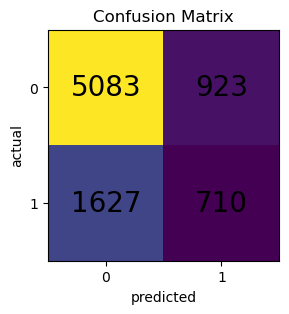

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      6006
           1       0.43      0.30      0.36      2337

    accuracy                           0.69      8343
   macro avg       0.60      0.58      0.58      8343
weighted avg       0.67      0.69      0.68      8343



In [13]:
# 1. import data
# 2. rapiin data

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=10, test_size=0.2)

# 3. latih model - Decision Tree

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# 4. evaluasi model

visualizeCM(model_dt, X_test, y_test)

optional - membuat visualisasi dari sebuah model decision tree

1. install python graphviz
2. install pydotplus
3. import package:
    - tree dari sklearn.tree
    - pydotplus
    - StringIO dari six
    - Image dari IPython.display

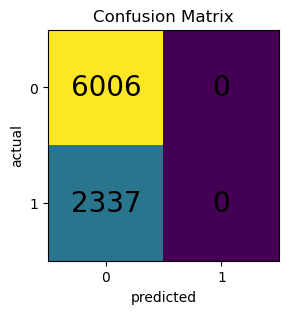

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      6006
           1       0.00      0.00      0.00      2337

    accuracy                           0.72      8343
   macro avg       0.36      0.50      0.42      8343
weighted avg       0.52      0.72      0.60      8343



c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# untuk contoh visualisasi ini, kita coba buat ulang model decision tree dengan maximum depth pilihan kita
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

# evaluasi model
visualizeCM(model_dt, X_test, y_test)

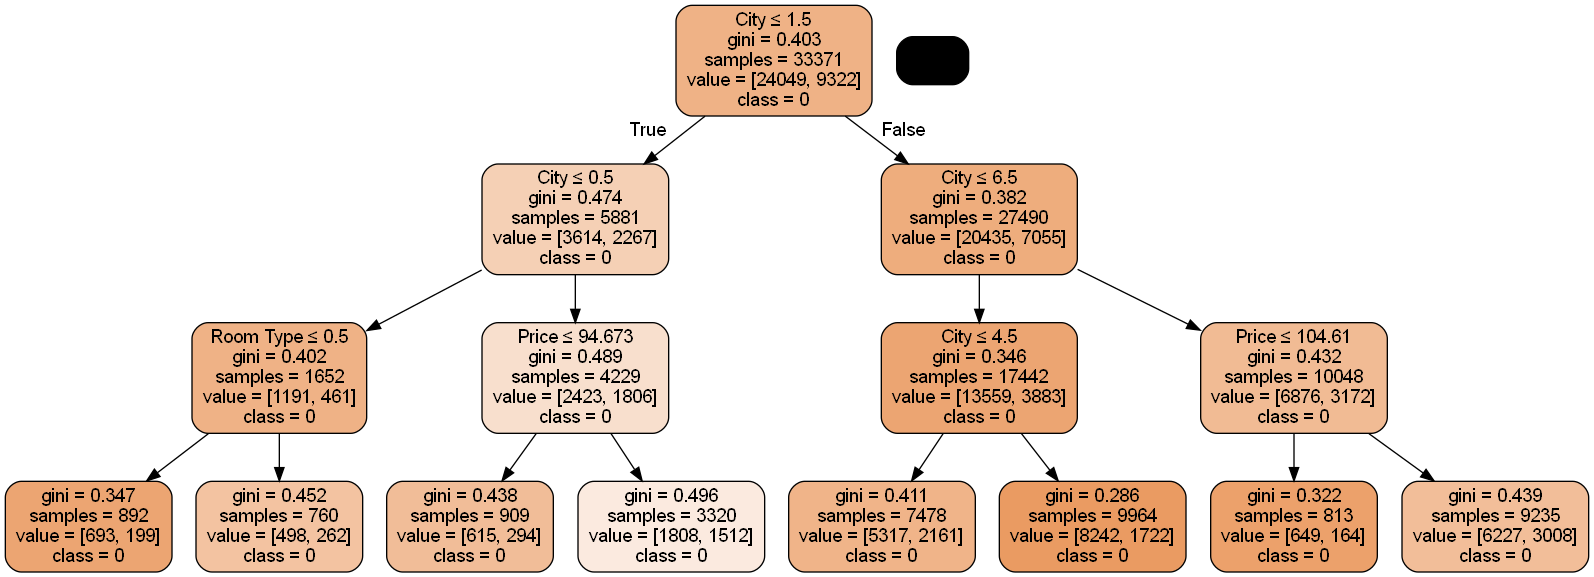

In [15]:
dot_data = StringIO()
tree.export_graphviz(model_dt, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 #  class_names=['Host','Superhost'], # the target names.
 feature_names=X_encoded.columns, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

contoh diatas adalah model decision tree yang tidak berguna karena hasil prediksi akan selalu menjadi 0, atau target adalah Host.

ini hanya untuk demonstrasi visualisasi sebuah decision tree.

Cobalah ubah parameter model, atau data preparation nya, supaya mendapat model decision tree yang lebih baik.

# Random Forest
membuat banyak decision tree, kemudian mengumpulkan vote dari decision tree tersebut. majoritas menang. jika mayoritas decision tree beranggapan data masuk ke kelas A, maka datanya di klasifikasi ke kelas A.

In [16]:
# 1. collect data
# 2. prep data
# 3. train model

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

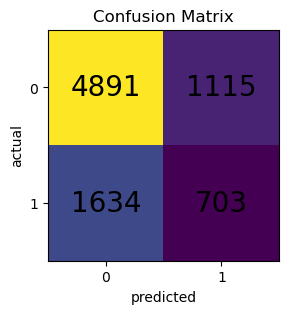

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6006
           1       0.39      0.30      0.34      2337

    accuracy                           0.67      8343
   macro avg       0.57      0.56      0.56      8343
weighted avg       0.65      0.67      0.66      8343



In [17]:
# 4. evaluasi
visualizeCM(model_rf, X_test, y_test)

untuk model random forest, ada atribut yang bisa kita ambil dari model nya, feature_importances_

In [18]:
model_rf.feature_importances_

array([0.07506842, 0.88008491, 0.00633977, 0.00490908, 0.00093765,
       0.0026039 , 0.03005627])

In [19]:
X_train.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity'],
      dtype='object')

fitur fitur yang kita gunakan, masing masing seberapa berpengaruh ke decision akhir kita memasukkan sebuah data ke kelas tertentu

In [20]:
pd.DataFrame({"fitur": X_train.columns, "importance": model_rf.feature_importances_}).sort_values("importance", ascending=False)

,fitur,importance
1,Price,0.880085
0,City,0.075068
6,Person Capacity,0.030056
2,Day,0.006340
3,Room Type,0.004909
5,Private Room,0.002604
4,Shared Room,0.000938


dari data feature importance ini, kita mengetahui kalau model kita hampir sepenuhnya menggunakan fitur Price saja untuk mengklasifikasi Superhost/ Host

bahkan kita bisa meng eclude 4 fitur dengan importance terendah dan seharusnya akurasi model tidak berubah.

# SVM
Support Vector Machine

sebenarnya bisa digunakan untuk masalah tipe regresi dan tipe klasifikasi. Tapi pada umumnya dia dimasukin ke kategori algoritma untuk klasifikasi.

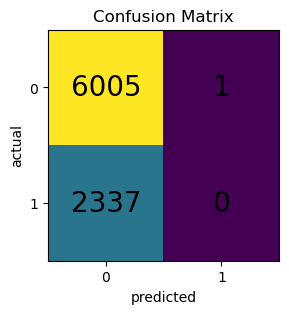

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      6006
           1       0.00      0.00      0.00      2337

    accuracy                           0.72      8343
   macro avg       0.36      0.50      0.42      8343
weighted avg       0.52      0.72      0.60      8343



In [21]:
# 1. collect data
# 2. data preparation
# 3. latih model
model_svm = SVC() # default kernel adalah radial
model_svm.fit(X_train, y_train)

# 4. evaluasi
visualizeCM(model_svm, X_test, y_test)

hasilnya buruk, kita bisa coba ubah parameter datanya untuk lihat apakah hasilnya lebih baik

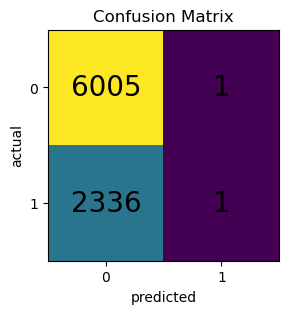

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      6006
           1       0.50      0.00      0.00      2337

    accuracy                           0.72      8343
   macro avg       0.61      0.50      0.42      8343
weighted avg       0.66      0.72      0.60      8343



In [22]:
# 3. latih model
model_svm = SVC(C=10) # default kernel adalah radial
model_svm.fit(X_train, y_train)

# 4. evaluasi
visualizeCM(model_svm, X_test, y_test)

kita bisa juga coba data scaling.

In [26]:
# kita pakai data yang sudah kita scale
X_es

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity
0,-1.923765,-0.236433,-0.998611,1.378413,-0.087368,1.475138,-0.952126
1,-1.923765,0.301180,-0.998611,1.378413,-0.087368,1.475138,0.586994
2,-1.923765,0.014341,-0.998611,1.378413,-0.087368,1.475138,-0.952126
3,-1.923765,0.620729,-0.998611,1.378413,-0.087368,1.475138,0.586994
4,-1.923765,0.806923,-0.998611,1.378413,-0.087368,1.475138,-0.952126
...,...,...,...,...,...,...,...
41709,1.369911,1.631481,1.001391,-0.678948,-0.087368,-0.677903,2.126114
41710,1.369911,0.159981,1.001391,-0.678948,-0.087368,-0.677903,-0.952126
41711,1.369911,1.349562,1.001391,-0.678948,-0.087368,-0.677903,-0.952126
41712,1.369911,0.146596,1.001391,1.378413,-0.087368,1.475138,-0.952126


In [27]:
# split jadi train dan test data
X_train, X_test, y_train, y_test = train_test_split(X_es, y_encoded, random_state=10, test_size=0.2)

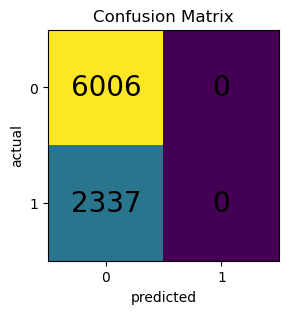

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      6006
           1       0.00      0.00      0.00      2337

    accuracy                           0.72      8343
   macro avg       0.36      0.50      0.42      8343
weighted avg       0.52      0.72      0.60      8343



c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# train ulang model
model_svm = SVC() # default kernel adalah radial, rbf
model_svm.fit(X_train, y_train)

# evaluasi
visualizeCM(model_svm, X_test, y_test)

hasil model masih buruk juga, mungkin memang data kali ini tidak cocok dengan SVM